In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r'c:\Users\omarf\Downloads\train.csv')
train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
test = pd.read_csv(r'c:\Users\omarf\Downloads\test.csv')
test.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [5]:
submission = pd.read_csv(r'c:\Users\omarf\Downloads\sample_submission.csv')
submission.head()

,id,loan_paid_back
0,593994,0
1,593995,0
2,593996,0
3,593997,0
4,593998,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [7]:
train.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [8]:
train.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [9]:
# show column types in train dataframe separately
dtypes = train.dtypes

numeric_cols = train.select_dtypes(include=['number']).columns.tolist()
object_cols = train.select_dtypes(include=['object']).columns.tolist()
bool_cols = train.select_dtypes(include=['bool']).columns.tolist()
datetime_cols = train.select_dtypes(include=['datetime', 'datetimetz']).columns.tolist()
other_cols = [c for c in train.columns if c not in numeric_cols + object_cols + bool_cols + datetime_cols]

print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical (object) columns ({len(object_cols)}): {object_cols}")
print(f"Boolean columns ({len(bool_cols)}): {bool_cols}")
print(f"Datetime columns ({len(datetime_cols)}): {datetime_cols}")
print(f"Other columns ({len(other_cols)}): {other_cols}\n")

print("Full dtype summary:")
print(dtypes)

Numeric columns (7): ['id', 'annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'loan_paid_back']
Categorical (object) columns (6): ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
Boolean columns (0): []
Datetime columns (0): []
Other columns (0): []

Full dtype summary:
id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object


In [10]:
train['gender'].unique()   

array(['Female', 'Male', 'Other'], dtype=object)

In [11]:
train['marital_status'].unique() 

array(['Single', 'Married', 'Divorced', 'Widowed'], dtype=object)

In [12]:
train['education_level'].unique()

array(['High School', "Master's", "Bachelor's", 'PhD', 'Other'],
      dtype=object)

In [13]:
train['employment_status'].unique()

array(['Self-employed', 'Employed', 'Unemployed', 'Retired', 'Student'],
      dtype=object)

In [14]:
train['loan_purpose'].unique()

array(['Other', 'Debt consolidation', 'Home', 'Education', 'Vacation',
       'Car', 'Medical', 'Business'], dtype=object)

In [15]:
train['grade_subgrade'].unique()

array(['C3', 'D3', 'C5', 'F1', 'D1', 'D5', 'C2', 'C1', 'F5', 'D4', 'C4',
       'D2', 'E5', 'B1', 'B2', 'F4', 'A4', 'E1', 'F2', 'B4', 'E4', 'B3',
       'E3', 'B5', 'E2', 'F3', 'A5', 'A3', 'A1', 'A2'], dtype=object)

employment_status       0.175941
debt_to_income_ratio    0.078790
credit_score            0.033343
grade_subgrade          0.026769
loan_amount             0.013486
annual_income           0.011776
interest_rate           0.010639
loan_purpose            0.000331
education_level         0.000325
gender                  0.000028
marital_status          0.000003
dtype: float64


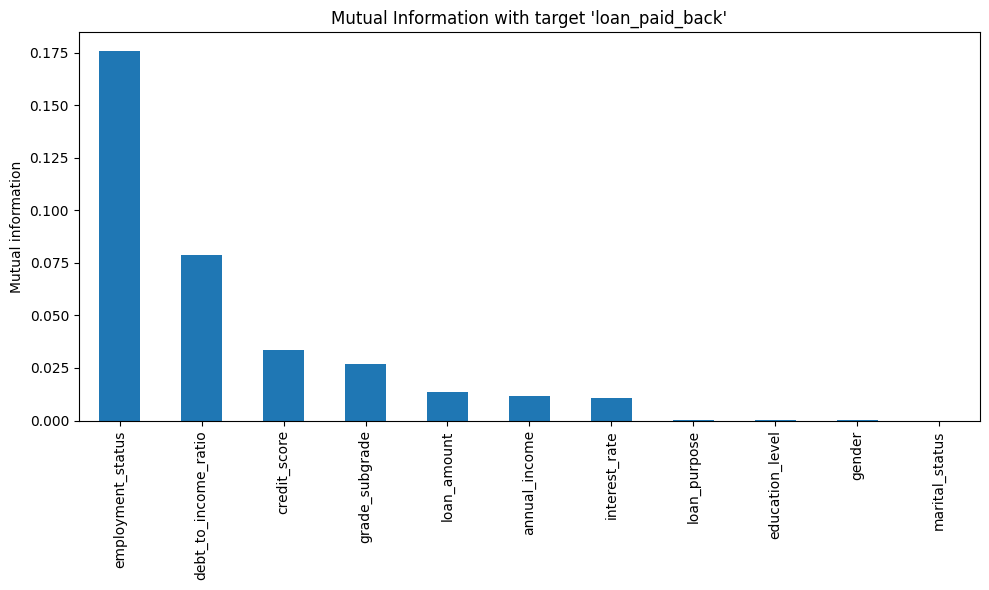

In [16]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# prepare features (exclude id and target)
features = [c for c in train.columns if c not in ("id", "loan_paid_back")]
X = train[features].copy()
y = train["loan_paid_back"].astype(int)

# identify categorical columns present in X
categorical = [c for c in object_cols if c in X.columns]
numeric = [c for c in X.columns if c not in categorical]

# encode categorical features with OrdinalEncoder
if categorical:
    oe = OrdinalEncoder()
    X[categorical] = oe.fit_transform(X[categorical])

# ensure no missing values (safety)
X = X.fillna(-999)

# discrete_features mask: True for originally categorical, False otherwise
discrete_mask = [col in categorical for col in X.columns]

# compute mutual information
mi = mutual_info_classif(X, y, discrete_features=discrete_mask, random_state=0)

# present results as a sorted pandas Series
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series)

# optional: plot
plt.figure(figsize=(10, 6))
mi_series.plot(kind="bar")
plt.title("Mutual Information with target 'loan_paid_back'")
plt.ylabel("Mutual information")
plt.tight_layout()
plt.show()

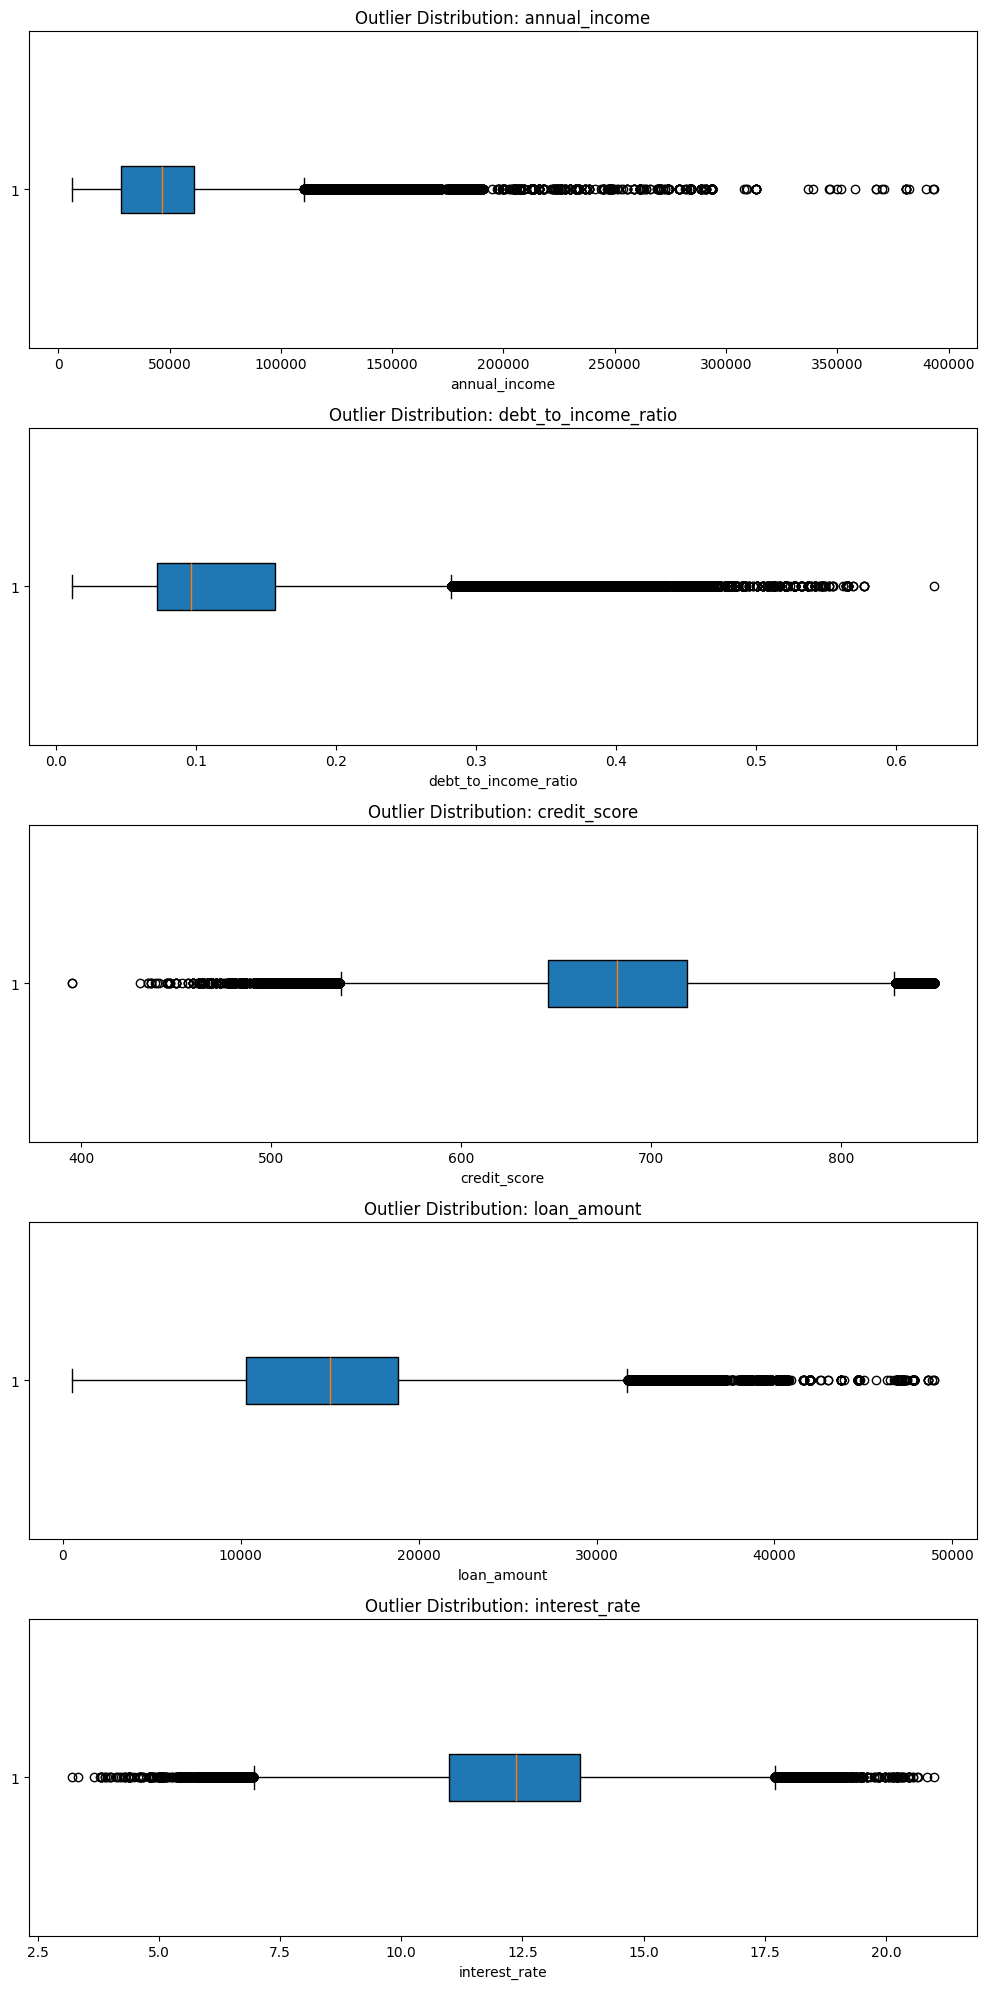

In [17]:
# Visualize outlier distribution for all numeric columns in train
fig, axes = plt.subplots(len(numeric), 1, figsize=(10, 4 * len(numeric)))
for i, col in enumerate(numeric):
    ax = axes[i] if len(numeric) > 1 else axes
    ax.boxplot(train[col], vert=False, patch_artist=True)
    ax.set_title(f'Outlier Distribution: {col}')
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()

In [18]:
# Winsorize (clip) outliers in all numeric columns of X to the 1st and 99th percentiles
for col in numeric:
    lower = X[col].quantile(0.01)
    upper = X[col].quantile(0.99)
    X[col] = X[col].clip(lower, upper)

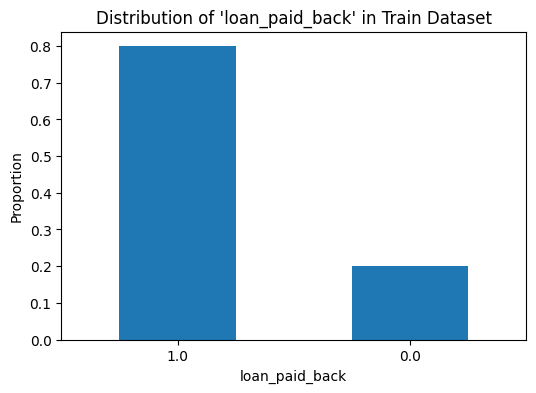

In [19]:
# Plot the distribution of the target column 'loan_paid_back' in the train dataset
plt.figure(figsize=(6, 4))
train['loan_paid_back'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of 'loan_paid_back' in Train Dataset")
plt.xlabel('loan_paid_back')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

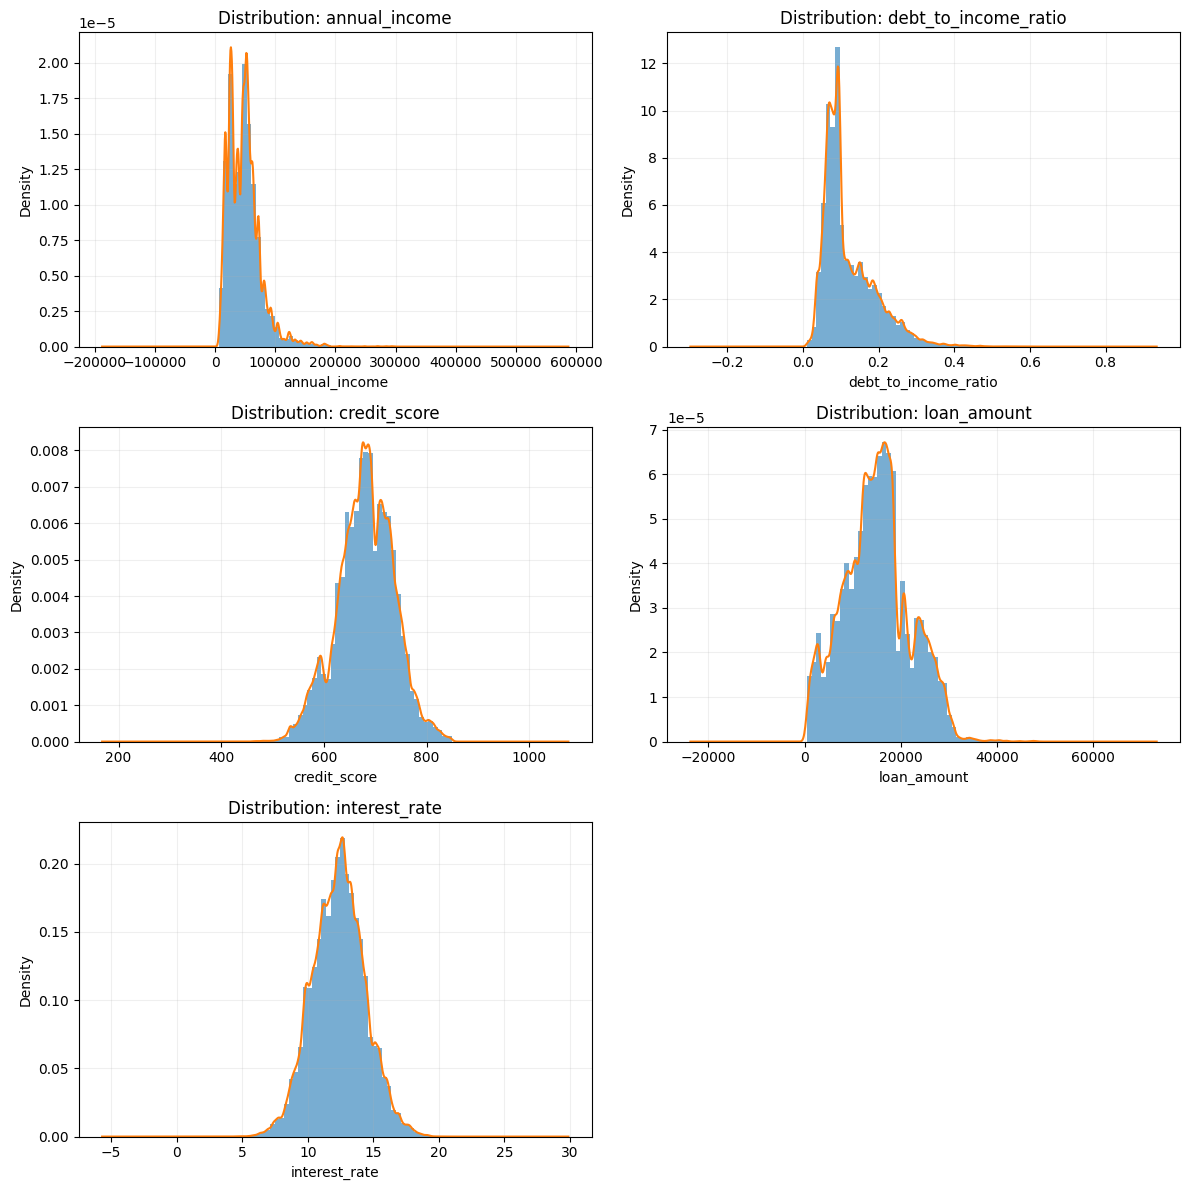

In [20]:
# plot distributions for numeric columns (excluding the target)
cols = numeric  # numeric is defined in earlier cells
n = len(cols)
cols_per_row = 2
rows = (n + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    # histogram (density) + KDE
    train[col].plot(kind='hist', bins=50, density=True, alpha=0.6, ax=ax, color='C0')
    train[col].plot(kind='kde', ax=ax, color='C1')
    ax.set_title(f'Distribution: {col}')
    ax.set_xlabel(col)
    ax.grid(alpha=0.2)

# remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

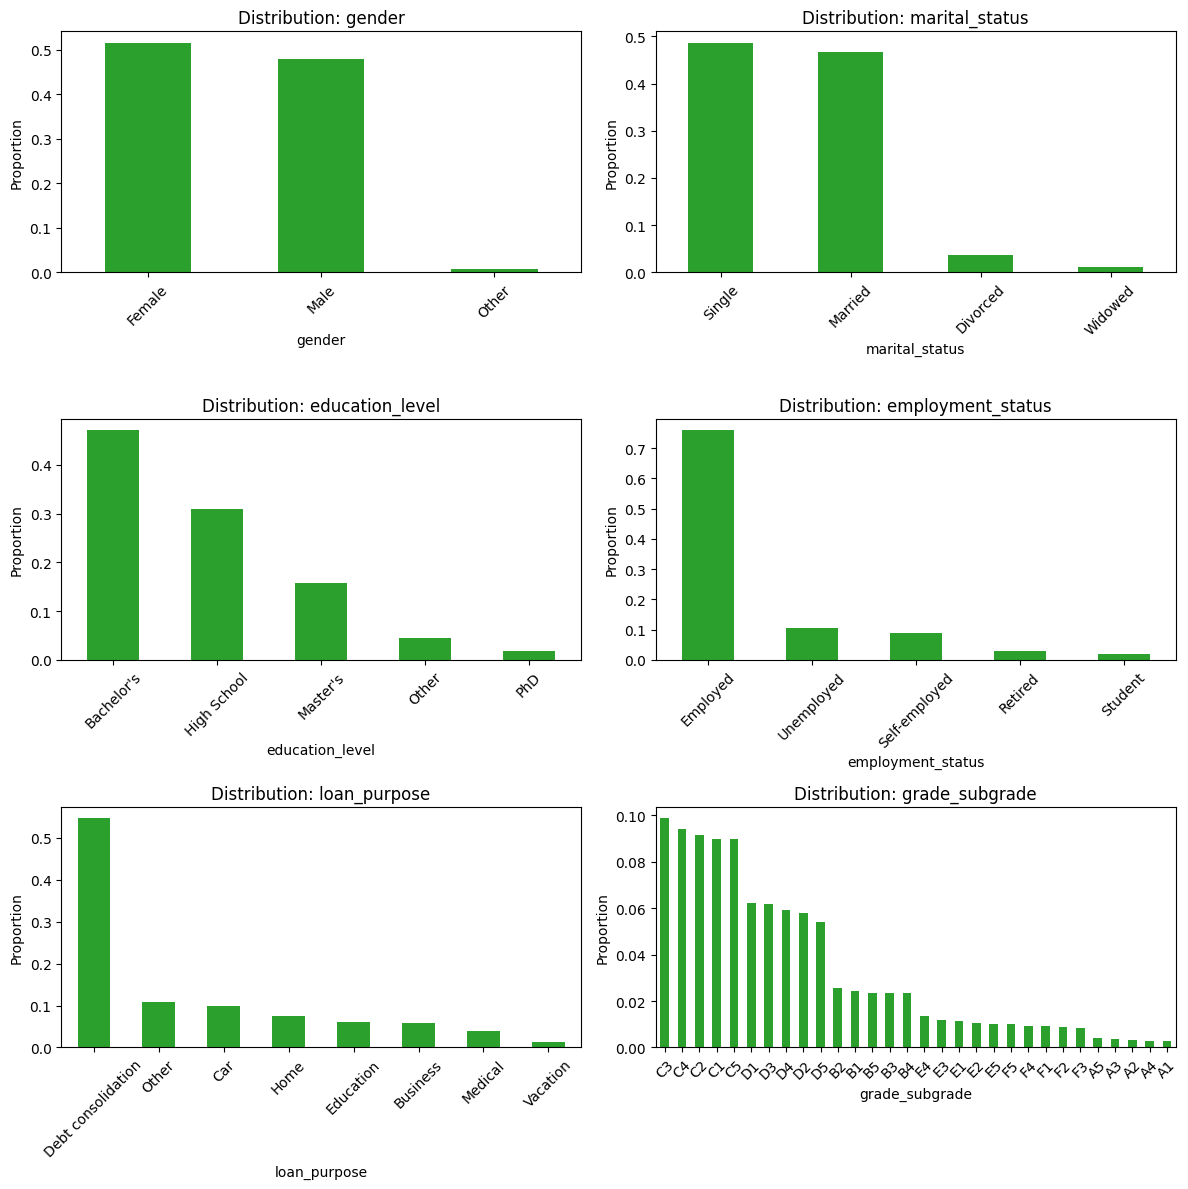

In [21]:
# Barplots for categorical columns
cat_cols = categorical  # uses existing 'categorical' list from earlier cells
cat_n = len(cat_cols)
rows = (cat_n + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    # plot proportions for readability
    train[col].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar', ax=ax, color='C2')
    ax.set_title(f'Distribution: {col}')
    ax.set_ylabel('Proportion')
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)

# remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

# Copy train for feature engineering
train_fe = train.copy()

# Label encode categorical columns
for col in categorical:
    le = LabelEncoder()
    train_fe[col] = le.fit_transform(train_fe[col].astype(str))

# Fill any remaining missing values (shouldn't be any, but for safety)
train_fe = train_fe.fillna(-999)

# Drop id column if present (not a feature)
if 'id' in train_fe.columns:
    train_fe = train_fe.drop('id', axis=1)

# train_fe is now ready for XGBoost
train_fe.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,0,2,1,2,6,12,1.0
1,22108.02,0.166,636,4593.10,12.92,1,1,2,0,2,17,0.0
2,49566.20,0.097,694,17005.15,9.76,1,2,1,0,2,14,1.0
3,46858.25,0.065,533,4682.48,16.10,0,2,1,0,2,25,1.0
4,25496.70,0.053,665,12184.43,10.21,1,1,1,0,6,15,1.0


In [ ]:
# ============================================================
# 1. FEATURE ENGINEERING (The successful one with +484 leaderboard gains)
# ============================================================
from sklearn.preprocessing import LabelEncoder   

train_fe = train.copy()

for col in categorical:
    le = LabelEncoder()
    train_fe[col] = le.fit_transform(train_fe[col].astype(str))

train_fe = train_fe.fillna(-999)

if "id" in train_fe.columns:
    train_fe = train_fe.drop("id", axis=1)

X = train_fe.drop("loan_paid_back", axis=1)
y = train_fe["loan_paid_back"]

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

oof_cat = np.zeros(len(X))
oof_xgb = np.zeros(len(X))


fold = 1
for train_idx, val_idx in skf.split(X, y):
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    print(f"\n========== Fold {fold} ==========")

    # ---------------- CATBOOST ----------------
    cat = CatBoostClassifier(
        eval_metric="AUC",
        verbose=0,
        random_state=42
    )
    cat.fit(X_train, y_train)
    oof_cat[val_idx] = cat.predict_proba(X_val)[:, 1]

    # ---------------- XGBOOST ----------------
    xgb = XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    xgb.fit(X_train, y_train)
    oof_xgb[val_idx] = xgb.predict_proba(X_val)[:, 1]

    # AUC for each model
    print("CAT AUC:", roc_auc_score(y_val, oof_cat[val_idx]))
    print("XGB AUC:", roc_auc_score(y_val, oof_xgb[val_idx]))

    fold += 1

# ============================================================
# STACKING META-FEATURES
# ============================================================
stacked_train = np.column_stack([oof_cat, oof_xgb])

meta_model = LogisticRegression()
meta_model.fit(stacked_train, y)

stacked_oof_preds = meta_model.predict_proba(stacked_train)[:, 1]

final_auc = roc_auc_score(y, stacked_oof_preds)
print("\n======================================")
print(" FINAL STACKING OOF AUC =", final_auc)
print("======================================")


'from sklearn.preprocessing import LabelEncoder   \n\ntrain_fe = train.copy()\n\nfor col in categorical:\n    le = LabelEncoder()\n    train_fe[col] = le.fit_transform(train_fe[col].astype(str))\n\ntrain_fe = train_fe.fillna(-999)\n\nif "id" in train_fe.columns:\n    train_fe = train_fe.drop("id", axis=1)\n\nX = train_fe.drop("loan_paid_back", axis=1)\ny = train_fe["loan_paid_back"]\n\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import roc_auc_score\nimport numpy as np\nimport pandas as pd\n\nfrom catboost import CatBoostClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.linear_model import LogisticRegression\n\n\nskf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)\n\noof_cat = np.zeros(len(X))\noof_xgb = np.zeros(len(X))\n\n\nfold = 1\nfor train_idx, val_idx in skf.split(X, y):\n    \n    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]\n    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]\n\n    print(f"\n========== Fold {fold

In [ ]:
# ============================================================
# 2. FULL TRAINING ON ALL DATA (This one is also the part of the successful one with +484 leaderboard gains)
# ============================================================

# Prepare test feature engineering (same as train)
test_fe = test.copy()

for col in categorical:
    le = LabelEncoder()
    test_fe[col] = le.fit_transform(test_fe[col].astype(str))

test_fe = test_fe.fillna(-999)

if "id" in test_fe.columns:
    test_ids = test_fe["id"]
    test_fe = test_fe.drop("id", axis=1)
else:
    test_ids = np.arange(len(test_fe))

X_test = test_fe.copy()

# ------------------------------------------------------------
# Train base models on full training set
# ------------------------------------------------------------

cat_full = CatBoostClassifier(
    eval_metric="AUC",
    verbose=0,
    random_state=42
)
cat_full.fit(X, y)
test_pred_cat = cat_full.predict_proba(X_test)[:, 1]

xgb_full = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_full.fit(X, y)
test_pred_xgb = xgb_full.predict_proba(X_test)[:, 1]

# ------------------------------------------------------------
# 3. STACKING TEST MATRIX
# ------------------------------------------------------------
stacked_test = np.column_stack([test_pred_cat, test_pred_xgb])

# Final stacked predictions
stacked_test_preds = meta_model.predict_proba(stacked_test)[:, 1]

# ============================================================
# 4. CREATE SUBMISSION FILE
# ============================================================

submission = pd.DataFrame({
    "id": test_ids,
    "loan_paid_back": stacked_test_preds
})

submission.to_csv("submission_stacked_cat_xgb.csv", index=False)
print("\n✅ Submission file saved as 'submission_stacked_cat_xgb.csv'")


'test_fe = test.copy()\n\nfor col in categorical:\n    le = LabelEncoder()\n    test_fe[col] = le.fit_transform(test_fe[col].astype(str))\n\ntest_fe = test_fe.fillna(-999)\n\nif "id" in test_fe.columns:\n    test_ids = test_fe["id"]\n    test_fe = test_fe.drop("id", axis=1)\nelse:\n    test_ids = np.arange(len(test_fe))\n\nX_test = test_fe.copy()\n\n# ------------------------------------------------------------\n# Train base models on full training set\n# ------------------------------------------------------------\n\ncat_full = CatBoostClassifier(\n    eval_metric="AUC",\n    verbose=0,\n    random_state=42\n)\ncat_full.fit(X, y)\ntest_pred_cat = cat_full.predict_proba(X_test)[:, 1]\n\nxgb_full = XGBClassifier(\n    objective="binary:logistic",\n    eval_metric="auc",\n    learning_rate=0.05,\n    max_depth=6,\n    subsample=0.8,\n    colsample_bytree=0.8,\n    random_state=42\n)\nxgb_full.fit(X, y)\ntest_pred_xgb = xgb_full.predict_proba(X_test)[:, 1]\n\n# ---------------------------